# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

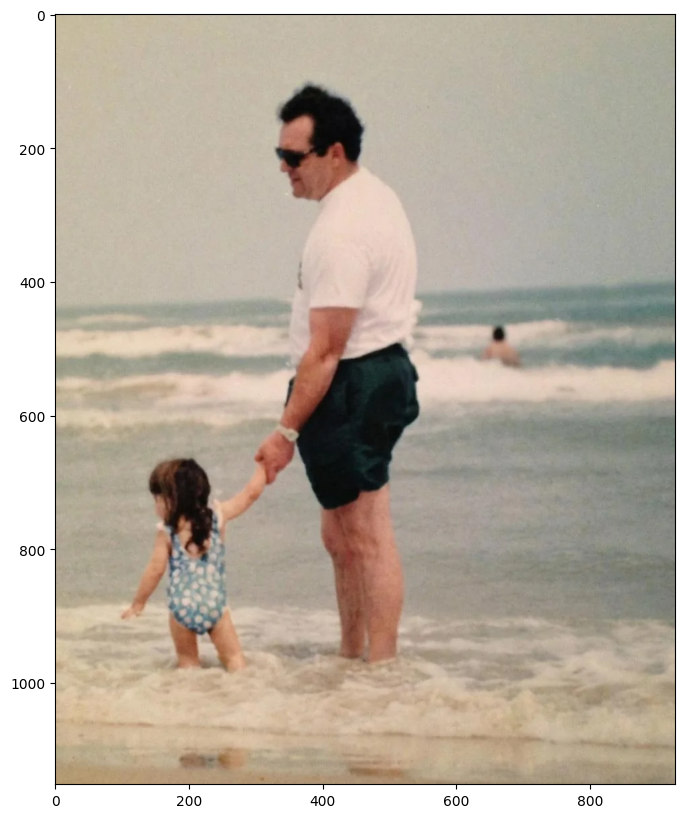

In [56]:
img = cv2.imread('man-with-daughter.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

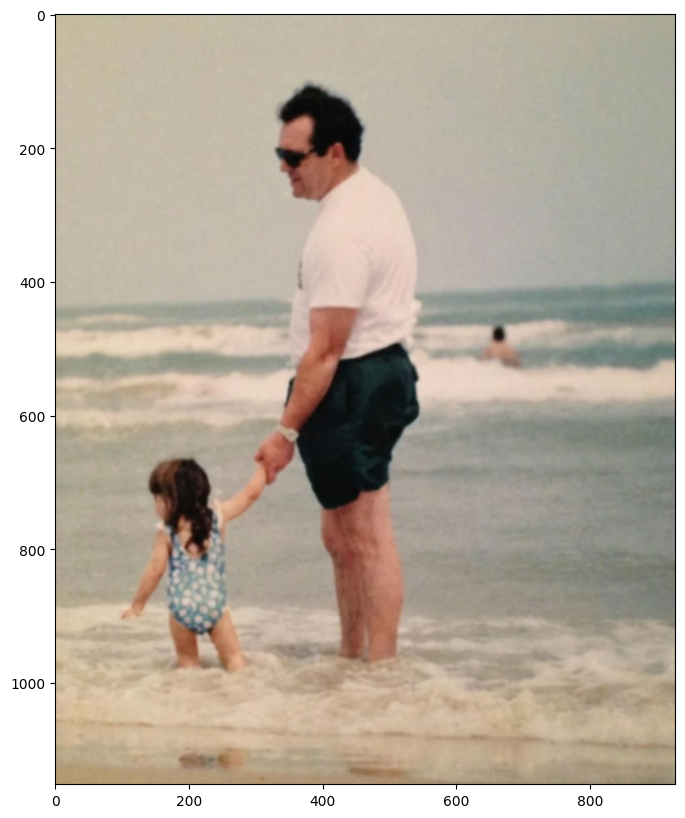

In [81]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(unsharp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-28.0..20.0].


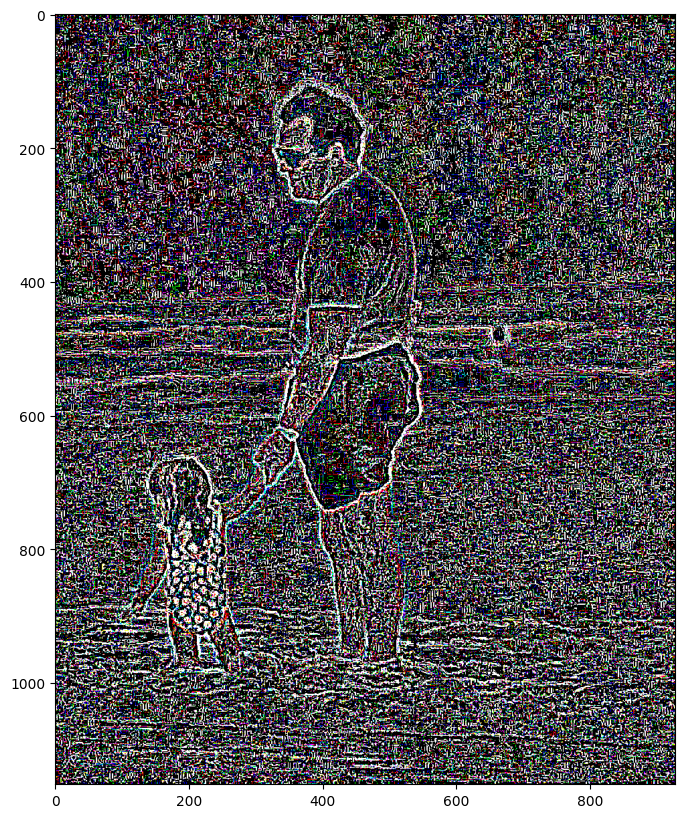

In [82]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = img.astype(np.float32) - unsharp.astype(np.float32)
plt.imshow(diff)

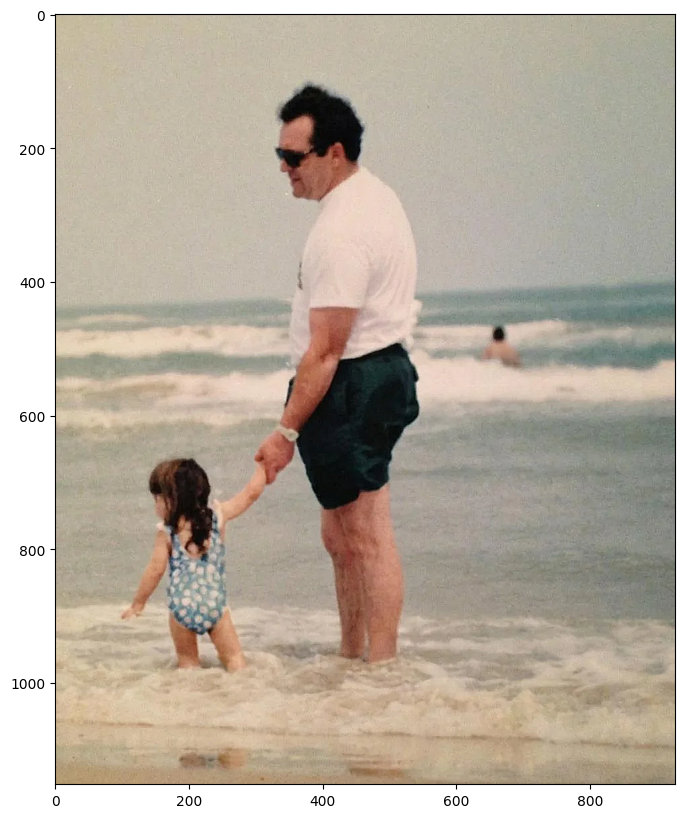

In [83]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
sharpened = img.astype(np.float32) + diff * 2.0
plt.imshow(sharpened.clip(0, 255).astype(np.uint8))

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?

### Answers
* Not too large. From 0.1 to 2
* We can't see any difference between original image
* The image looks unnatural